In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
imdb = pd.read_csv('imdb.csv') #index_col = 0
imdb['Class'] = np.where(imdb['Class'].str.contains("P"), 1, 0)

In [3]:
from sklearn.model_selection import train_test_split
X = np.array(imdb['Text'])
Y = np.array(imdb['Class'])
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.25)

In [4]:
n_elements = len(Y)
training_indices = np.random.randint(low=0, high=n_elements, size=30)

In [5]:
X_train = X[training_indices]
Y_train = Y[training_indices]

In [6]:
X_pool = np.delete(X, training_indices)
Y_pool = np.delete(Y, training_indices)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf_vectorizer = TfidfVectorizer(binary=True,stop_words='english',ngram_range = (1,2))
tfidf_vectorizer.fit(X)

TfidfVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')

In [9]:
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_pool_tfidf = tfidf_vectorizer.transform(X_pool)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [10]:
from sklearn.naive_bayes import BernoulliNB
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [11]:
learner = ActiveLearner(
        estimator = MultinomialNB(), 
        query_strategy = uncertainty_sampling,
        X_training = X_train_tfidf, 
        y_training = Y_train)

In [12]:
n_query = 500
queried_idx = []
performance_history = [learner.score(X_test_tfidf, Y_test)]
for i in range(n_query):
    idx, instance = learner.query(X_pool_tfidf)
    if (idx not in queried_idx):
        queried_idx.append(idx)
        X_teach, Y_teach = X_pool_tfidf[idx], Y_pool[idx]
        learner.teach(X = X_teach, y = Y_teach)
        score = learner.score(X_test_tfidf, Y_test)
        performance_history.append(score)
        print('Data no. %d queried, new accuracy: %f' % (idx, score))

Data no. 5621 queried, new accuracy: 0.483294
Data no. 5473 queried, new accuracy: 0.616000
Data no. 5821 queried, new accuracy: 0.483765
Data no. 2164 queried, new accuracy: 0.616941
Data no. 5772 queried, new accuracy: 0.585882
Data no. 1328 queried, new accuracy: 0.607059
Data no. 3404 queried, new accuracy: 0.633882
Data no. 1053 queried, new accuracy: 0.608471
Data no. 5682 queried, new accuracy: 0.660235
Data no. 1914 queried, new accuracy: 0.623059
Data no. 474 queried, new accuracy: 0.664000
Data no. 2084 queried, new accuracy: 0.618353
Data no. 5902 queried, new accuracy: 0.489882
Data no. 1315 queried, new accuracy: 0.619765
Data no. 5803 queried, new accuracy: 0.698353
Data no. 1025 queried, new accuracy: 0.568000
Data no. 963 queried, new accuracy: 0.692706
Data no. 2747 queried, new accuracy: 0.636235
Data no. 2741 queried, new accuracy: 0.696941
Data no. 4894 queried, new accuracy: 0.646588
Data no. 5919 queried, new accuracy: 0.703059
Data no. 5070 queried, new accuracy:

Data no. 4904 queried, new accuracy: 0.783529
Data no. 626 queried, new accuracy: 0.783529
Data no. 5446 queried, new accuracy: 0.776000
Data no. 2360 queried, new accuracy: 0.786824
Data no. 5401 queried, new accuracy: 0.777412
Data no. 1258 queried, new accuracy: 0.788235
Data no. 5435 queried, new accuracy: 0.783529
Data no. 6272 queried, new accuracy: 0.768941
Data no. 39 queried, new accuracy: 0.781176
Data no. 3548 queried, new accuracy: 0.764706
Data no. 1819 queried, new accuracy: 0.776471
Data no. 5597 queried, new accuracy: 0.766588
Data no. 405 queried, new accuracy: 0.778824
Data no. 2935 queried, new accuracy: 0.785412
Data no. 1545 queried, new accuracy: 0.777412
Data no. 1802 queried, new accuracy: 0.783059
Data no. 6160 queried, new accuracy: 0.777412
Data no. 4636 queried, new accuracy: 0.784471
Data no. 1809 queried, new accuracy: 0.779294
Data no. 3312 queried, new accuracy: 0.780706
Data no. 4803 queried, new accuracy: 0.776941
Data no. 836 queried, new accuracy: 0.

Data no. 3728 queried, new accuracy: 0.784941
Data no. 1353 queried, new accuracy: 0.788706
Data no. 5190 queried, new accuracy: 0.791059
Data no. 4920 queried, new accuracy: 0.788706
Data no. 1618 queried, new accuracy: 0.792000
Data no. 4471 queried, new accuracy: 0.790118
Data no. 3390 queried, new accuracy: 0.786353
Data no. 5252 queried, new accuracy: 0.791059
Data no. 1584 queried, new accuracy: 0.787765
Data no. 4239 queried, new accuracy: 0.792000
Data no. 468 queried, new accuracy: 0.798588
Data no. 1229 queried, new accuracy: 0.799059
Data no. 196 queried, new accuracy: 0.796235
Data no. 4671 queried, new accuracy: 0.801882
Data no. 5129 queried, new accuracy: 0.802353
Data no. 3338 queried, new accuracy: 0.796706
Data no. 5384 queried, new accuracy: 0.783529
Data no. 3588 queried, new accuracy: 0.781647
Data no. 1702 queried, new accuracy: 0.774588
Data no. 3631 queried, new accuracy: 0.760941
Data no. 5826 queried, new accuracy: 0.771765
Data no. 6033 queried, new accuracy:

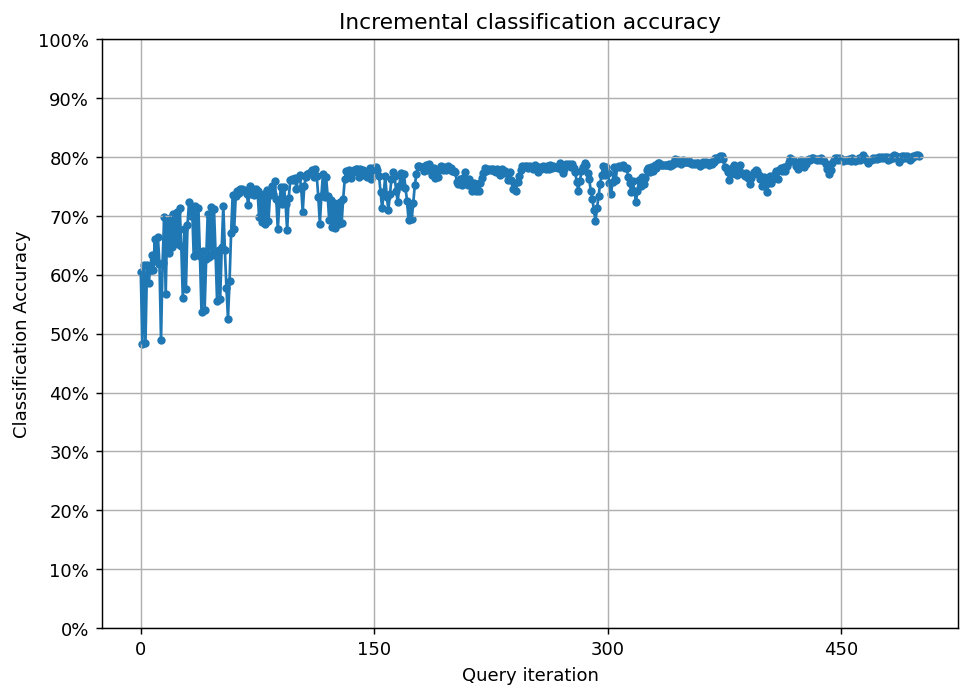

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()  